#**SciPy**

---

Finding Minimum of a given Fnction using scipy library.

---



**Function**:

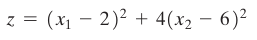

**Subject to**

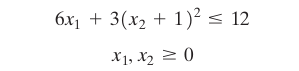

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D


#Plotting the given function

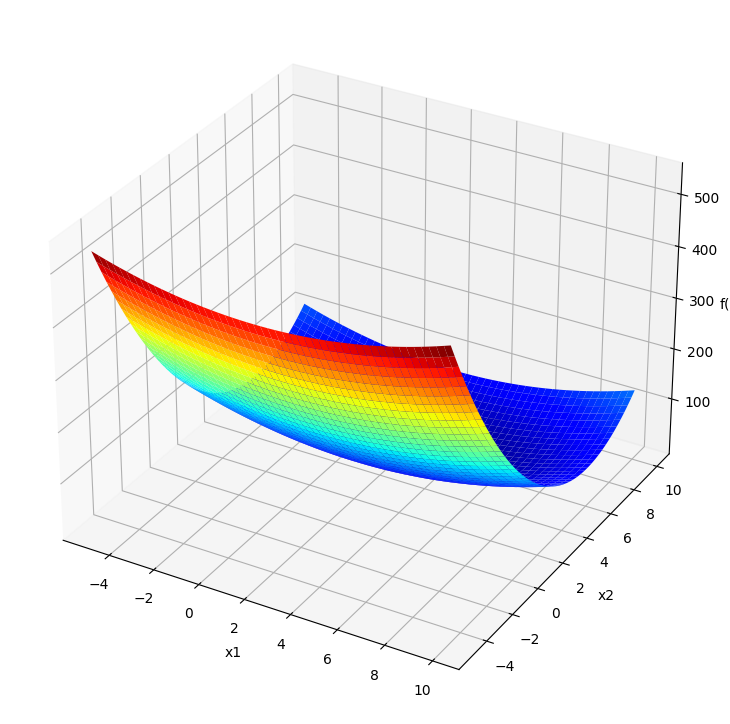

In [45]:
f = lambda x1,x2: (x1-2)**2 + 4*(x2-6)**2
x1=np.linspace(-5,10,500)
x2=np.linspace(-5,10,500)

X, Y = np.meshgrid(x1,x2)
F=f(X,Y)


fig=plt.figure(figsize=(20,15))
ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(X,Y,F,cmap='jet')

# fig.colorbar(surf,shrink=0.2,aspect=10)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(X)')

plt.show()

Finding Minimunm without subjective functions

In [46]:
f = lambda x: (x[0]-2)**2 + 4*(x[1]-6)**2
x0=[1,0]

result=minimize(f,x0)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.1722433041015337e-13
        x: [ 2.000e+00  6.000e+00]
      nit: 7
      jac: [ 8.136e-08 -1.800e-06]
 hess_inv: [[ 5.001e-01 -3.841e-04]
            [-3.841e-04  1.271e-01]]
     nfev: 24
     njev: 8

#Plotting subjective and function together

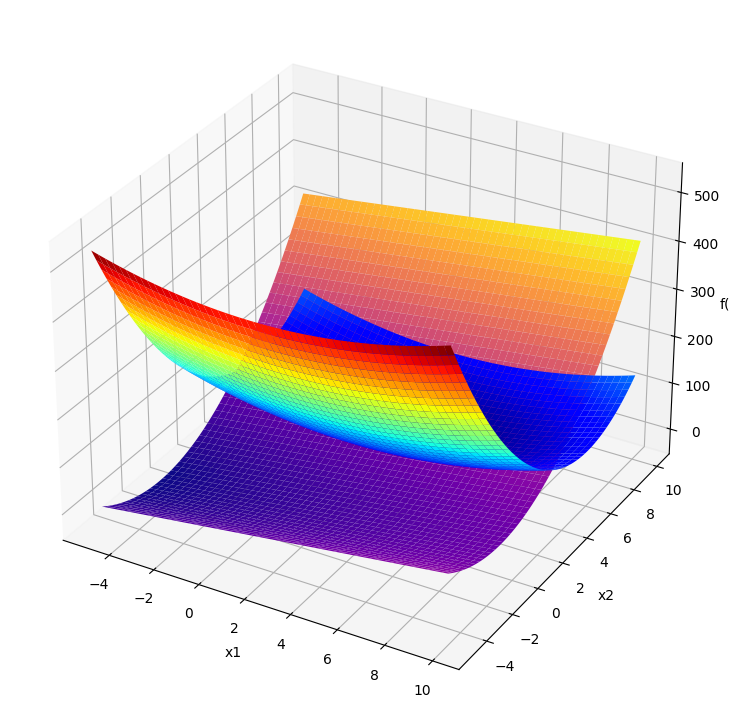

In [47]:
g=lambda x1,x2: (6*x1+3*(x2+1)**2-12)
G=g(X,Y)

fig=plt.figure(figsize=(20,15))

ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(X,Y,G,cmap='plasma')
ax.plot_surface(X,Y,F,cmap='jet')


ax.set_xlabel('x1')

ax.set_ylabel('x2')
ax.set_zlabel('f(X)')

plt.show()

In [48]:
cons=({'type':'ineq','fun':lambda x: -(6*x[0]+3*(x[1]+1)**2-12)})

bounds=((0,None),(0,None))

x0=(2,5)
result1=minimize(f,x0,bounds=bounds,constraints=cons)
result1


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 103.99999999218439
       x: [ 7.228e-14  1.000e+00]
     nit: 7
     jac: [-4.000e+00 -4.000e+01]
    nfev: 22
    njev: 7

In [49]:
result2=minimize(f,x0)
result2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.3972696611095355e-16
        x: [ 2.000e+00  6.000e+00]
      nit: 2
      jac: [-1.461e-08 -1.734e-12]
 hess_inv: [[ 1.000e+00 -1.844e-09]
            [-1.844e-09  1.250e-01]]
     nfev: 9
     njev: 3

#Contour without subjective functions

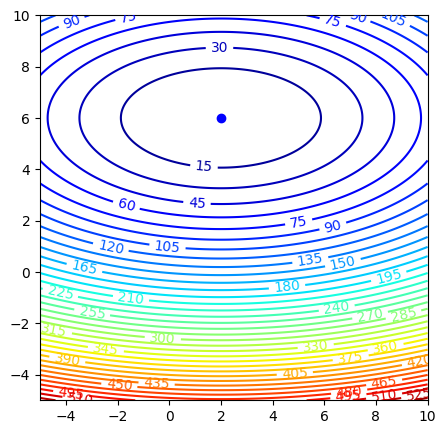

In [50]:
fig = plt.figure(figsize=(5,5))


cp = plt.contour(X, Y, F,levels=50, cmap='jet');
plt.clabel(cp)

z=[0 for i in x1]
plt.plot(result2.x[0],result2.x[1],c='b',marker='o')#result2 is without subjective functions

plt.show()

#Contour with subjective functions

<ipython-input-52-50c8b942fbd1>:7: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x1,np.sqrt(4-2*x1)-1,'--',linewidth=1,color='black')
<ipython-input-52-50c8b942fbd1>:8: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(x1,-np.sqrt(4-2*x1)-1,'--',linewidth=1,color='black')


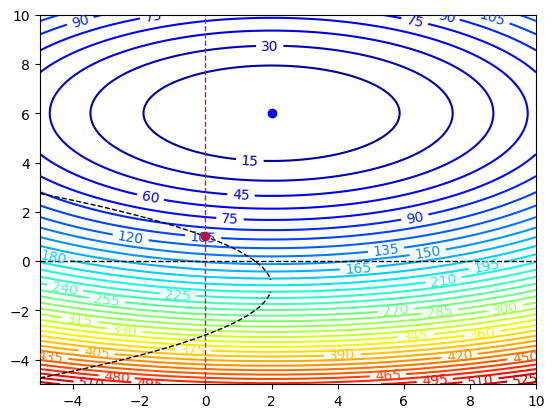

In [52]:
cp = plt.contour(X, Y, F,levels=50, cmap='jet');
plt.clabel(cp)

plt.plot(x1,z,'--',linewidth=1,color='black')
plt.plot(z,x2,'--',linewidth=1,color='brown')

plt.plot(x1,np.sqrt(4-2*x1)-1,'--',linewidth=1,color='black')
plt.plot(x1,-np.sqrt(4-2*x1)-1,'--',linewidth=1,color='black')

plt.plot(result1.x[0],result1.x[1],c='r',marker='o')#result1 is with subjective functions
plt.plot(result2.x[0],result2.x[1],c='b',marker='o')#result2 is without subjective functions

plt.show()